Creaeted to plot the output of coherence_test.py. May be edited to plot other versions of similar output from other files.

In [31]:
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pickle
import numpy as np

(2739, 60)

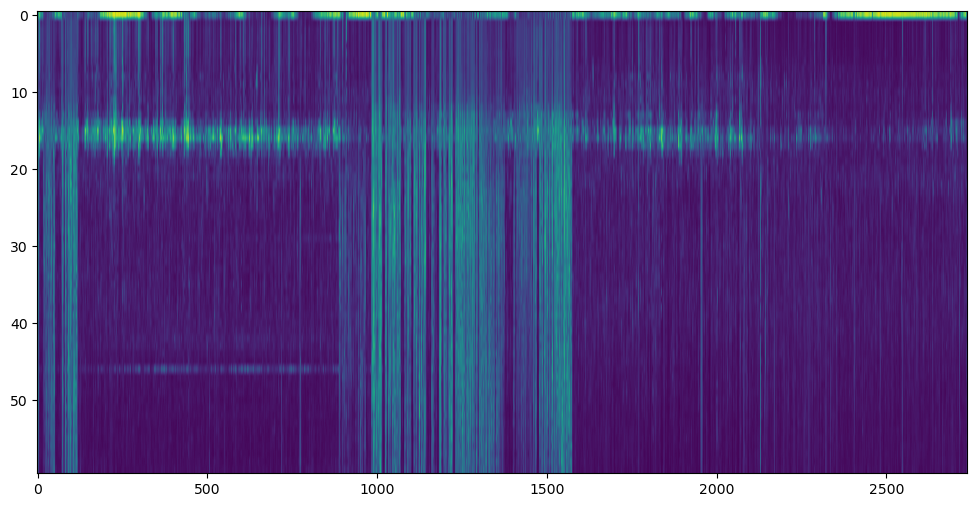

In [2]:
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\exact_detection_significance_160312000048.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_detection_significance_160312000048.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_detection_significance_160314083848.pkl"
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\exact_detection_significance_160314083848.pkl"
file = r"D:\CSM\Mines_Research\large_scale_coherence_results\qr_detection_significance_160313000018_160314235949.pkl"
with open(file, "rb") as f:
    detection_significances = pickle.load(f)
plt.figure(figsize=(12, 6))
# plt.plot(detection_significances[:100])

plt.imshow(detection_significances.T, aspect="auto")
detection_significances.shape

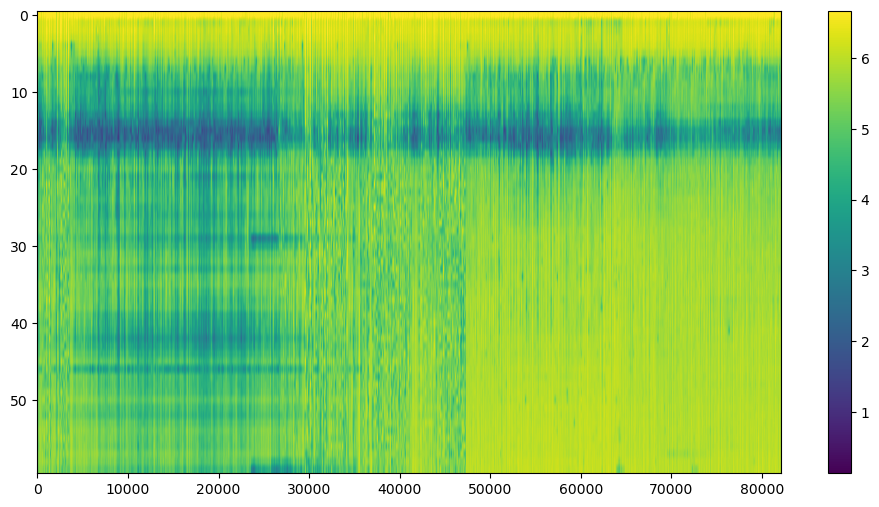

In [3]:
# file = r"D:\CSM\Mines_Research\Repositories\Coherence_Analyses\test_results\qr_eig_estimates_160314083848.pkl"
file = r"D:\CSM\Mines_Research\large_scale_coherence_results\qr_eig_estimatess_160313000018_160314235949.pkl"
with open(file, "rb") as f:
    eig_estimates = pickle.load(f)
plt.figure(figsize=(12, 6))
plt.imshow(eig_estimates, aspect="auto", vmax=np.percentile(eig_estimates, 80), vmin=np.percentile(eig_estimates, 1))
plt.colorbar()
# eig_estimates.shape
# np.min(eig_estimates)

In [18]:
file = r"D:\CSM\Mines_Research\large_scale_coherence_results\qr_metadata_160313000018_160314235949.pkl"
with open(file, "rb") as f:
    metadata = pickle.load(f)

In [69]:
metadata.keys()
metadata["sub_window_length"]
metadata["sampling_rate"]
metadata['files'][-1]

'160314235949'

In [4]:
re = eig_estimates.reshape((60, int(eig_estimates.shape[1]/30), 30))
# re[0, 0] == eig_estimates[0,:30]
red = re / np.tile(np.sum(re, axis=2), (30, 1, 1)).transpose(1, 2, 0)
# red = re / np.sum(re, axis=2)
red = red.reshape(eig_estimates.shape)
# np.sum(re, axis=2).shape
red = np.log(red)

In [49]:
start_time = datetime.datetime(2016, 3, 13, 0, 0, 18)
end_time = datetime.datetime(2016, 3, 14, 23, 59, 49)
time_lims = mdates.date2num([start_time, end_time])

# freqs = np.linspace(0, int(metadata["sampling_rate"]/2 * (3/5)), 1/metadata["sub_window_length"])
freqs = np.linspace(0, int(metadata["sampling_rate"]/2 * (3/5)), red.shape[0])
freq_lims = [freqs[0], freqs[-1]]

In [47]:
print(freqs.shape)
print(red.shape)

(60,)
(60, 82170)


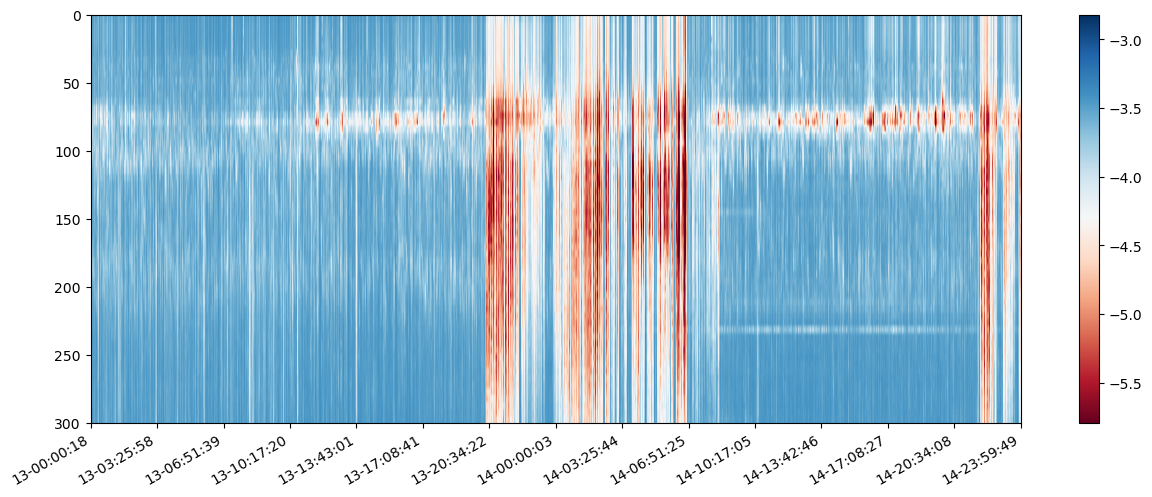

In [71]:
last_ind = -1
# plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(15, 6))
im = ax.imshow(np.flip(red[1:,:last_ind], axis=1), extent=[time_lims[0],time_lims[-1], freq_lims[-1], freq_lims[0]], aspect="auto", vmax=np.percentile(red, 90), vmin=np.percentile(red, 5), cmap="RdBu")
ax.xaxis.set_ticks(np.linspace(time_lims[0], time_lims[-1], 15))
fig.colorbar(im)
ax.xaxis_date()
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:%M:%S"))
# gca().xaxis.set_major_formatter(...)
# plt.colorbar()

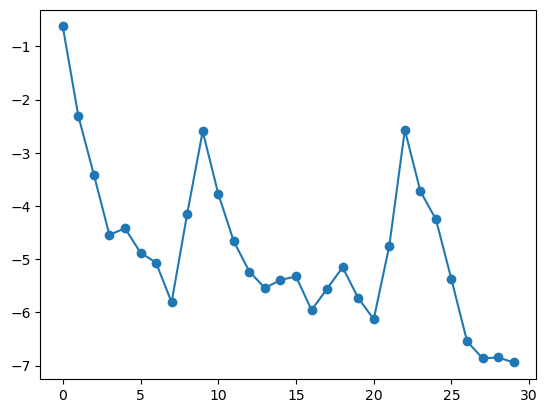

In [6]:
plt.plot(red[0, :30], '-o')
# plt.plot(eig_estimates[0, :60])